# Prediction using Decision Tree Algorithm


Objective: Creating a Decision Tree classifier and visualizing it graphically.

## Author: Pranshu Dhingra

-------------------------------------------------

# Importing the Libraries

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import seaborn as sns
# Set the styles to Seaborn
sns.set()


# Reading and Exploring the Data

In [ ]:
# Reading the Data
species_data=pd.read_csv('Iris.csv')
species_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#split dataset in features and target variable
X = species_data.drop(['Species','Id'],axis=1)
y= species_data['Species']

In [ ]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
display(X.shape, y.shape)

(150, 4)

(150,)

# Decision Tree Algorithm
### (Unpruned Tree)

In [ ]:
#importing the library for splitting the dataset into train and tes 

from sklearn.model_selection import train_test_split

In [ ]:
# a split of 0.25 indicates that 75% is the training data and the rest 25% is the test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

In [ ]:
print("The dimensions of the training set of the feature variables is: ",X_train.shape)
print("The dimensions of the training set of the target is: ",y_train.shape)
print("The dimensions of the test set of the feature variables is: ",X_test.shape)
print("The dimensions of the test set of the target is: ",y_test.shape)

The dimensions of the training set of the feature variables is:  (112, 4)
The dimensions of the training set of the target is:  (112,)
The dimensions of the test set of the feature variables is:  (38, 4)
The dimensions of the test set of the target is:  (38,)


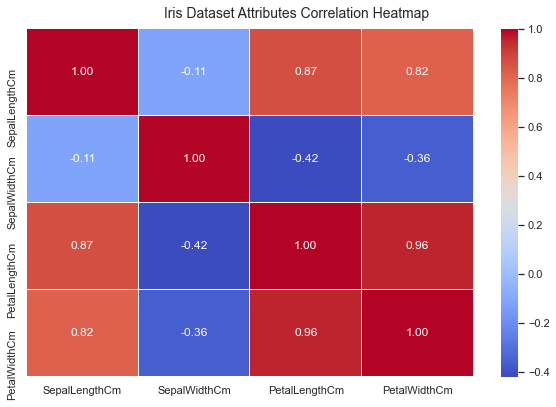

In [ ]:
# plotting a heatmap to visualize the significant correlations of pair of variables

corr_matrix=X.corr()
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(corr_matrix,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Iris Dataset Attributes Correlation Heatmap', fontsize=14)

Visualizing the correlation matrix as a heatmap helps us realize that Sepal Width is the only feature not significantly correlated with any other feature.
Sepal Length has a good correlation with the petal length as well as the petal width and also, there is a good correlation between the petal length and the petal width.
These relationships will help us verify our results in the latter part.

In [ ]:
#Create Decision Tree classifer object using gini index

import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(random_state=50)

# Train Decision Tree Classifer

clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

In [ ]:
#Feature Importance

arr=pd.Series(clf.feature_importances_,index=X.columns)
arr

SepalLengthCm    0.026000
SepalWidthCm     0.017859
PetalLengthCm    0.395440
PetalWidthCm     0.560702
dtype: float64

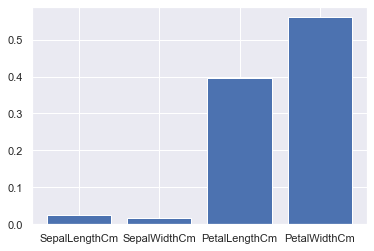

In [ ]:
langs=X.columns
plt.bar(langs,arr)
plt.show()

A score is assigned to each of the features based on how important they are in the classification process.

The given data shows that the 'PetalWidthCm' feature is the most important in classifying our dataset and hence will be used for inititalizing the building of decision tree classifier.

In [ ]:
#Creating Decision Tree Classifier

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

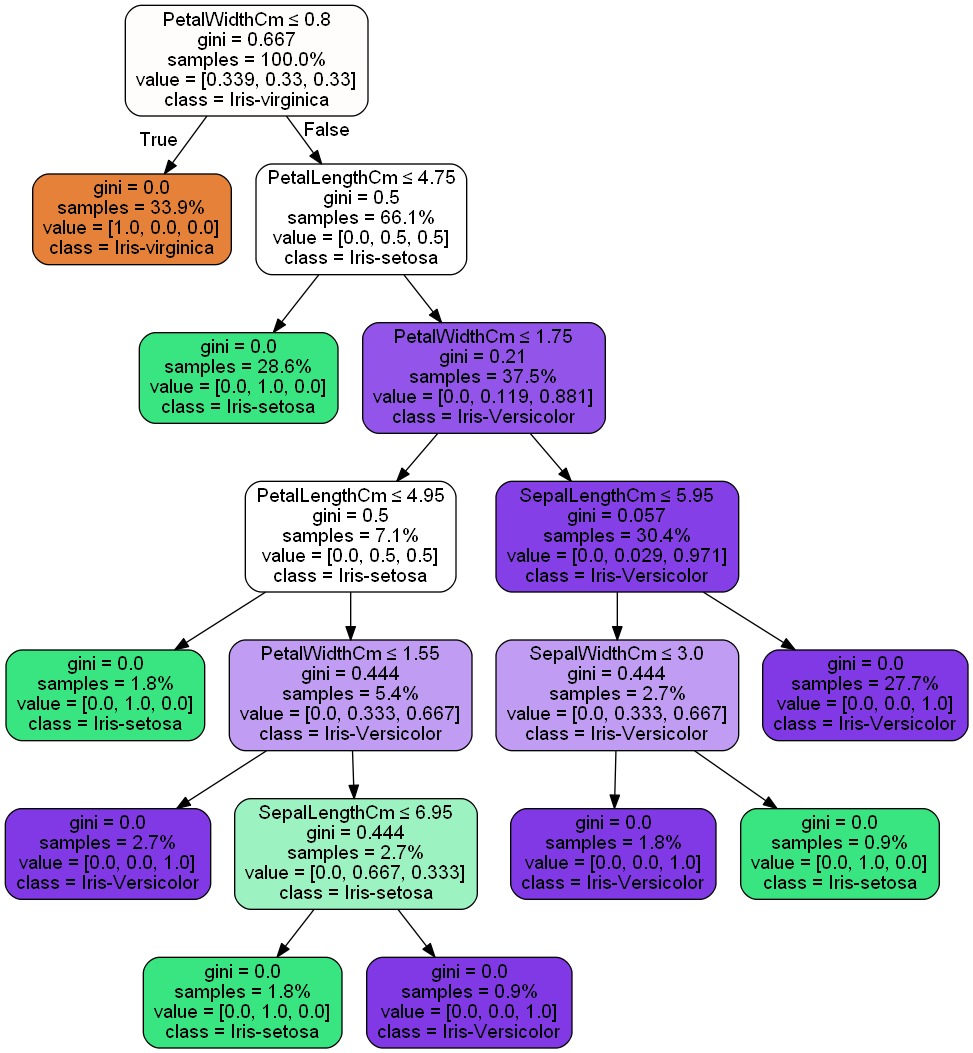

In [ ]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

This is unpruned decision tree.
The gini value indicates how homogeneous a group of class is. The closer the value to 0, the homogeneous it is whereas the farther the value from 0, the heterogeneous the class is.

We are going to create an optimized decision tree by finding the optimized depth of the tree from the given data.
The results can be compared easily.

In [ ]:
# predicting the labels of the test attributes

y_pred=clf.predict(X_test)

In [ ]:
# shows the dataframe of first 5 actual versus predicted values for the test data

df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df.reset_index(drop=True).head()

,Actual Values,Predicted Values
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor


In [ ]:
array1=df['Actual Values'].value_counts()
array2=df['Predicted Values'].value_counts()
combined_array= pd.DataFrame({'Actual Values': array1, 'Predicted Values': array2})  
combined_array

,Actual Values,Predicted Values
Iris-setosa,12,12
Iris-versicolor,13,14
Iris-virginica,13,12


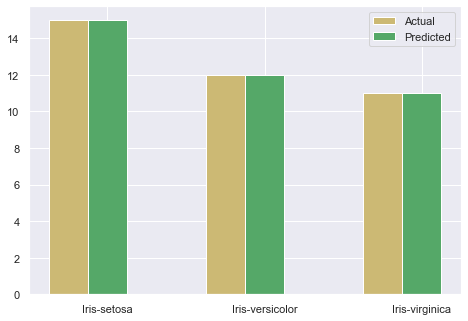

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_target_values=species_data['Species'].unique() 
data = [[15,12,11],
        [15,12,11]]
X = np.arange(3)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'y', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(unique_target_values)
ax.legend(labels=['Actual','Predicted'])
plt.show()

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
confusionMatrix= pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
confusionMatrix

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


<AxesSubplot:>

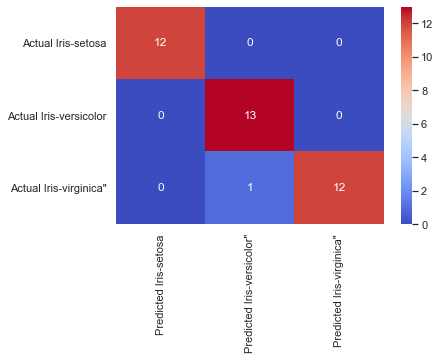

In [ ]:
sns.heatmap(confusionMatrix, cmap='coolwarm', annot=True)


In [ ]:

print('The number of correctly classified samples:',accuracy_score(y_test, y_pred, normalize=False))


The number of correctly classified samples: 37


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



Let us try to interpret the given figures.

Consider the case of Iris-versicolor. 

It's precision is 87% which means that our model predicts 87% of the time the classification of the species 'Iris-Versicolor'.
Now, it's recall is 100% which means that our model predicts 100% of times the classification of 'Iris-Versicolor' when it is actually so.

Similar interpretations can be made for other species as well.


In [ ]:
# Accuracy score for the training and test data

from sklearn.metrics import accuracy_score

acc_train=accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
print("The accuracy of the training data is ",acc_train)
acc_test=accuracy_score(y_true=y_test, y_pred=y_pred)
print("The accuracy of the test data is ",acc_test)

The accuracy of the training data is  1.0
The accuracy of the test data is  0.9736842105263158


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

def multiclass_roc_auc_plot(truth, pred, average="macro"):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=3
    
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i], 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

ROC-AUC score of the model   : 0.9805128205128205


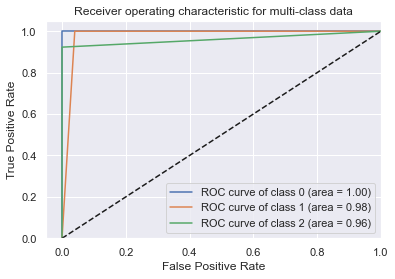

In [ ]:
area_UnderCurve=multiclass_roc_auc_score(y_test,y_pred)
print('ROC-AUC score of the model   :',area_UnderCurve)
multiclass_roc_auc_plot(y_test, y_pred)

The ROC score is 0.9610 which is a good score. It represents the area under the curve and should be as close to 1 as possible for the model to be a good one.

In [ ]:
# change in accuracy on changing the depth of the decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
score_ls = [] 
score_acc_ls = []

for tree_depth in [1,2,3,4,5,6,7,8]:
            tree_model = DecisionTreeClassifier(max_depth=tree_depth,random_state=50)
            tree_model.fit(X_train, y_train)
            
            scores = cross_val_score(tree_model, X_train,y_train, cv=10, scoring='accuracy') 
            score_ls.append(np.mean(scores))
            predictions_op = tree_model.predict(X_test)
            acc_scores=  accuracy_score(y_test, predictions_op)         
            score_acc_ls.append((acc_scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6,7,8]), pd.Series(score_acc_ls).round(3)], axis=1)
temp.columns = ['Depth', 'Accuracy score']
print(temp)

   Depth  Accuracy score
0      1           0.658
1      2           0.947
2      3           0.974
3      4           0.974
4      5           0.947
5      6           0.974
6      7           0.974
7      8           0.974


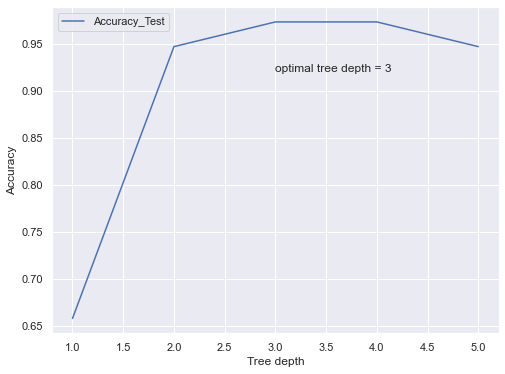

In [ ]:
# Graphical representation of change in the accuracy on changing the depth of the decision tree

fig = plt.figure(figsize=(8,6))
ax0 = fig.add_subplot(111)
acc_test = []
auc_test = []
for k in range(1,6):
        tree = DecisionTreeClassifier(max_depth=k,random_state=23)
        clf=tree.fit(X_train, y_train) 
        predictions_test = clf.predict(X_test)
        acc_scores_test = accuracy_score(y_test, predictions_test) 
        acc_test.append(acc_scores_test)
        scores_test = cross_val_score(clf, X_test,y_test, cv=10, scoring='accuracy') 
        auc_test.append(np.mean(scores_test))
        
ax0.plot(range(1,6),acc_test,label='Accuracy_Test')
ax0.legend()
ax0.set_xlabel('Tree depth')
ax0.set_ylabel('Accuracy')
plt.text(3, .92, "optimal tree depth = 3")
plt.show()

# Decision Tree Algorithm 
### (Pruned to the depth of 3 - Improved Classification)

In [ ]:
# Building Decision Classifier for tree depth of 3

clf_optimized = DecisionTreeClassifier(random_state=50,max_depth=3)

# Train Decision Tree Classifer

clf_optimized.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [ ]:
X = species_data.drop(['Species','Id'],axis=1)

arr_optimized=pd.Series(clf_optimized.feature_importances_,index=X.columns)
arr_optimized

SepalLengthCm    0.000000
SepalWidthCm     0.000000
PetalLengthCm    0.410225
PetalWidthCm     0.589775
dtype: float64

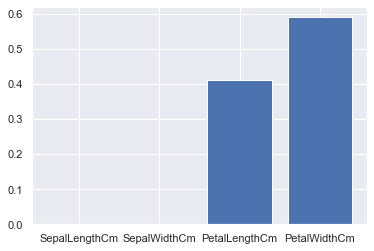

In [ ]:
langs=X.columns
plt.bar(langs,arr_optimized)
plt.show()

A score is assigned to each of the features based on how important they are in the classification process.

The given data shows that the 'PetalWidthCm' feature is the most important in classifying our dataset and hence will be used for inititalizing the building of the optimized decision tree classifier.

In [ ]:
#Creating Decision Tree Classifier

import sklearn.tree as tree
dot_data = tree.export_graphviz(clf_optimized, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"], 
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)


In [ ]:
# shows the dataframe of first 5 actual versus predicted values for the test data

df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df.reset_index(drop=True).head()

,Actual Values,Predicted Values
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor


In [ ]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df.reset_index(drop=True).head()

,Actual Values,Predicted Values
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor


In [ ]:
y_pred_optimized = clf_optimized.predict(X_test)

In [ ]:

df1=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred_optimized})  
predict_prob_op=clf_optimized.predict_proba(X_test)
df1.reset_index(drop=True).head()

,Actual Values,Predicted Values
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor


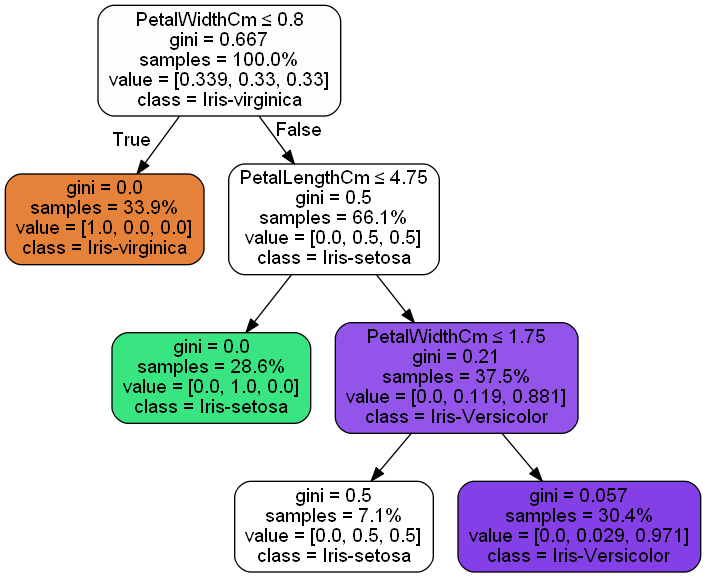

In [ ]:
import sklearn.tree as tree
dot_data = tree.export_graphviz(clf_optimized, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"], 
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)
graph_op = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph_op.create_png())

In [ ]:
confusion_optimized = confusion_matrix(y_test, y_pred_optimized)
confusionMatrix_optimized= pd.DataFrame(confusion_optimized, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
confusionMatrix_optimized

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


<AxesSubplot:>

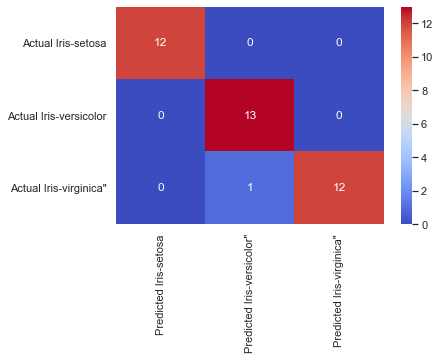

In [ ]:
sns.heatmap(confusionMatrix_optimized, cmap='coolwarm', annot=True)

In [ ]:

print('The number of correctly classified samples:',accuracy_score(y_test, y_pred_optimized, normalize=False))


The number of correctly classified samples: 37


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred_optimized))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



Let us try to interpret the given figures.

Consider the case of Iris-versicolor. 

It's precision is 93% which means that our model predicts 93% of the time the classification of the species 'Iris-Versicolor'.
Now, it's recall is 100% which means that our model predicts 100% of times the classification of 'Iris-Versicolor' when it is actually so.

Similar interpretations can be made for other species as well.


ROC-AUC score of the model   : 0.9805128205128205


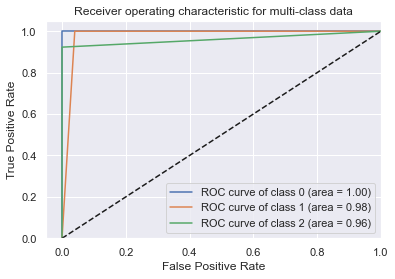

In [ ]:
area_UnderCurve=multiclass_roc_auc_score(y_test,y_pred_optimized)
print('ROC-AUC score of the model   :',area_UnderCurve)
multiclass_roc_auc_plot(y_test, y_pred_optimized)

The ROC score is 0.9805 which is a good score. It represents the area under the curve and should be as close to 1 as possible for the model to be a good one.

#### Thus, the optimized decision-tree classification is for the tree-depth of 3 with a higher rate of accuracy in classifying the objects.

#### Now, if we feed any new data to this classifier, it would be able to predict the right class accordingly. 


## **Thank You!**